
A partir del dataset encuesta_aerolinea.csv con resultados de una encuesta de una aerolínea, generad un modelo de Regresión Logística que permita clasificar la satisfacción del cliente entre las dos posibles alternativas que se indican en la columna (satisfaction_binary) del dataset: 1 para “satisfied” o 0 para “neutral or dissatisfied”. 

Se deben extraer las siguientes columnas para la generación del modelo: Gender, Age, Inflight wifi service,  Departure/Arrival time convenient, Ease of Online booking, Gate location, Food and drink, Online boarding, Seat comfort, Inflight entertainment, On-board service, Leg room service, Baggage handling, Check service, Inflight service, Cleanliness, satisfaction y satisfaction_binary.

Como método de preparación del DataFrame, se elige eliminar todas las observaciones que contengan NaN, utilizando el método na.drop() de la siguiente manera: <mi_dataframe>.na.drop()

La columna “satisfaction_binary” contiene la representación binaria 1 o 0 de las categorías de la columna “satisfaction”. La columna “satisfaction_binary” debe pasarse como el parámetro de labelCol al crear el objeto LogisticRegression.

Las columnas categóricas (Gender) deben convertirse a una representación vectorial utilizando StringIndexer() y OneHotEncoder().

**Los pasos para la implementación del modelo puede reducirse a los siguientes:**

1. Extracción de las columnas requeridas en un nuevo DataFrame.
2. Limpiar el Dataframe eliminando los NaN.
3. Convertir columnas categóricas utilizando StringIndexer y OneHotEncoder.
4. Generar el vector con las features para el entrenamiento del modelo con VectorAssembler()
5. Construir el objeto LogisticRegression pasando los parámetros para featuresCol y labelCol.
6. Construir el objeto Pipeline con los diferentes pasos de transformación.
7. Separa el conjunto de datos en conjuntos de entrenamiento y evaluación.
8. Entrenamos el modelo con el método fit() del Pipeline.
9. Construimos el objeto BinaryClassificationEvaluator().

10\. Evaluar la precisión (accuracy) del modelo.

11\. Utilizar la libreria handyspark para obtener el gráfico de ROC (opcional).

In [0]:
%fs
ls dbfs:/FileStore/tables/

path,name,size,modificationTime
dbfs:/FileStore/tables/encuesta_aerolinea-1.csv,encuesta_aerolinea-1.csv,11986211,1706643440000
dbfs:/FileStore/tables/encuesta_aerolinea.csv,encuesta_aerolinea.csv,11986211,1706643304000
dbfs:/FileStore/tables/encuesta_aerolinea_simplificado-1.csv,encuesta_aerolinea_simplificado-1.csv,11986211,1705509312000
dbfs:/FileStore/tables/encuesta_aerolinea_simplificado.csv,encuesta_aerolinea_simplificado.csv,11986211,1705509276000


In [0]:
lines = sc.textFile('dbfs:/FileStore/tables/encuesta_aerolinea.csv')
df_preview = spark.read.format("csv").option("inferSchema","true").option("header","true").load("dbfs:/FileStore/tables/encuesta_aerolinea.csv")
df_limited = df_preview.limit(5)  # Limita a 5 registros
df_limited.display()


_c0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0,satisfied


In [0]:
from pyspark.sql.types import StructType, StructField, StringType, FloatType, TimestampType, IntegerType

In [0]:
schema = StructType([
    StructField("C0", IntegerType(), True),
    StructField("ID", IntegerType(), True),
    StructField("gender", StringType(), True),
    StructField("customer_type", StringType(), True),
    StructField("age", FloatType(), True),
    StructField("type_of_travel", StringType(), True),
    StructField("class", StringType(), True),
    StructField("flight_distance", FloatType(), True),
    StructField("wifi", FloatType(), True),
    StructField("time_convenient", FloatType(), True),
    StructField("booking", FloatType(), True),
    StructField("gate", FloatType(), True),
    StructField("food", FloatType(), True),
    StructField("boarding", FloatType(), True),
    StructField("comfort", FloatType(), True),
    StructField("entertainment", FloatType(), True),
    StructField("on_board_service", FloatType(), True),
    StructField("room_service", FloatType(), True),
    StructField("handling", FloatType(), True),
    StructField("checking", FloatType(), True),
    StructField("inflight", FloatType(), True),
    StructField("cleanliness", FloatType(), True),
    StructField("departures_delay", FloatType(), True),
    StructField("arrivals_delay", FloatType(), True),
    StructField("satisfaction", StringType(), True), 
])

In [0]:
df_raw = spark.read.format("csv").option("header", True).schema(schema).load('dbfs:/FileStore/tables/encuesta_aerolinea.csv')
df = df_raw.na.drop()


MLlib es la biblioteca de aprendizaje automático (machine learning) de Apache Spark. Está diseñada para simplificar la construcción de aplicaciones de aprendizaje automático a gran escala, integrándose de manera fluida con el resto del ecosistema de Spark. 

MLlib proporciona una amplia variedad de algoritmos y utilidades comunes de aprendizaje automático, incluyendo clasificación, regresión, clustering, filtrado colaborativo (como sistemas de recomendación), reducción de dimensionalidad, y selección de modelos. Aprovecha la distribución de datos y el procesamiento en paralelo de Spark, lo que la hace adecuada para manejar grandes volúmenes de datos de manera eficiente.

Aunque MLlib está escrita en Scala, es accesible desde otros lenguajes de programación soportados por Spark, como Python (a través de PySpark) y Java.

Por lo tanto, MLlib es una biblioteca robusta y versátil para realizar aprendizaje automático en plataformas distribuidas, aprovechando la potencia y escala de Apache Spark. Es especialmente útil para aplicaciones que requieren manejar grandes conjuntos de datos y realizar operaciones de aprendizaje automático complejas.

In [0]:
from pyspark.sql.functions import when

# Seleccionar las columnas necesarias
selected_columns = [
    "gender", "age", "wifi", "time_convenient", "booking",
    "gate", "food", "boarding", "comfort", "entertainment",
    "on_board_service", "room_service", "handling", "checking",
    "inflight", "cleanliness", "satisfaction"
]

df_selected = df.select(selected_columns)

# Convertir la columna 'satisfaction' en binaria
df_selected = df_selected.withColumn(
    "satisfaction_binary", 
    when(col("satisfaction") == "satisfied", 1).otherwise(0)
)


In [0]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml import Pipeline

# Indexar y codificar las columnas categóricas
gender_indexer = StringIndexer(inputCol="gender", outputCol="genderIndex")
gender_encoder = OneHotEncoder(inputCol="genderIndex", outputCol="genderVec")

# Asssembler de todas las características en un vector
assembler_inputs = ["genderVec"] + selected_columns[1:-2]  # excluyendo la columna 'satisfaction' y 'satisfaction_binary'
assembler = VectorAssembler(inputCols=assembler_inputs, outputCol="features")



En esta parte, se trabaja con la transformación de características, específicamente indexando y codificando las variables categóricas y combinando todas las características relevantes en un solo vector.

1. **Importar las funciones necesarias de PySpark ML**:

   - `StringIndexer`, `OneHotEncoder`, y `VectorAssembler` son transformadores de PySpark ML que ayudan a convertir datos en formatos adecuados para modelos de aprendizaje automático.
   - `Pipeline` es una forma de encadenar múltiples transformaciones y estimadores, lo que facilita la construcción y gestión de flujos de trabajo de aprendizaje automático.

2. **Indexar y codificar las columnas categóricas**:

   - `StringIndexer`: Convierte la columna categórica 'gender' en índices numéricos. Esto es necesario porque muchos algoritmos de aprendizaje automático prefieren trabajar con números en lugar de texto.
   - `OneHotEncoder`: Transforma los índices numéricos generados por `StringIndexer` en un formato de codificación one-hot. En la codificación one-hot, cada categoría única en la columna se representa como un vector binario.

3. **Assembler de todas las características en un vector**:

   - Aquí, se crea una lista `assembler_inputs` que contiene el nombre de la columna codificada ('genderVec') y todas las otras columnas seleccionadas, excepto 'satisfaction' y 'satisfaction_binary'.
   - `VectorAssembler` se utiliza para combinar todas estas columnas en una única columna de características llamada 'features'. Esto es importante porque los modelos de aprendizaje automático en PySpark, como la regresión logística, esperan que los datos de entrada estén en un único vector de características.

Estas operaciones están preparando los datos para ser utilizados en un modelo de aprendizaje automático, asegurando que todas las variables estén en el formato adecuado y combinadas en una estructura que el modelo puede procesar eficientemente.

In [0]:
#Configura y agrega la regresión logística al pipeline.

from pyspark.ml.classification import LogisticRegression

# Configurar la regresión logística
lr = LogisticRegression(labelCol="satisfaction_binary", featuresCol="features")


# Creación del pipeline
preprocessing_stages = [gender_indexer, gender_encoder, assembler,lr]
pipeline = Pipeline(stages=preprocessing_stages)



Aquí, se configura el estimador de regresión logística y se integra junto con las etapas de preprocesamiento previas en un solo pipeline. Veamos cada paso en detalle:

1. **Importar LogisticRegression de PySpark ML**:
   `LogisticRegression` es la clase de PySpark ML que proporciona la implementación del algoritmo de regresión logística para la clasificación binaria.

2. **Configurar la regresión logística**:

   Aquí, se crea una instancia del modelo de regresión logística (`lr`). 
   - `labelCol="satisfaction_binary"` indica que la columna 'satisfaction_binary' será utilizada como la etiqueta (o variable dependiente) para el modelo. Esta es la columna que se transformó anteriormente a formato binario.
   - `featuresCol="features"` especifica que la columna 'features' contiene las características (o variables independientes) que el modelo usará para hacer predicciones. Esta columna fue generada por el `VectorAssembler` y contiene todas las características relevantes en un formato vectorial.

3. **Creación del pipeline**:
   - Aquí, se crea una lista `preprocessing_stages` que incluye todas las etapas de preprocesamiento (`gender_indexer`, `gender_encoder`, `assembler`) y el modelo de regresión logística (`lr`).
   - Luego, se crea un objeto `Pipeline` con estas etapas. En PySpark, un `Pipeline` es una secuencia de transformadores y estimadores (como modelos de aprendizaje automático) que se ejecutan en un orden específico. Este enfoque facilita la gestión del flujo de trabajo, ya que permite que los datos pasen a través de todas las etapas de preprocesamiento y modelización de manera eficiente y ordenada.

Este código finaliza la configuración del flujo de trabajo para el modelo de regresión logística. Una vez que el `Pipeline` está configurado, puedes entrenarlo con un conjunto de datos y luego usarlo para hacer predicciones.

In [0]:
# Dividir en conjunto de entrenamiento y prueba
train_data, test_data = df_selected.randomSplit([0.7, 0.3], seed=42)

# Entrenar el modelo
model = pipeline.fit(train_data)

# Realizar predicciones
predictions = model.transform(test_data)

# Evaluar el modelo
from pyspark.ml.evaluation import BinaryClassificationEvaluator

evaluator = BinaryClassificationEvaluator(labelCol="satisfaction_binary", metricName="areaUnderROC")
auc = evaluator.evaluate(predictions)
print(f"Área bajo la curva ROC: {auc}")


Área bajo la curva ROC: 0.8770380437425292



Este último fragmento de código completa el flujo de trabajo del modelo de regresión logística en PySpark, abarcando la división de los datos, el entrenamiento del modelo, la realización de predicciones y la evaluación del modelo. Expliquemos cada paso:

1. **Dividir en conjunto de entrenamiento y prueba**:

   Aquí, se divide el DataFrame `df_selected` en dos subconjuntos: uno para entrenamiento (`train_data`) y otro para pruebas (`test_data`). La división se hace de forma que el 70% de los datos se asignan al entrenamiento y el 30% a las pruebas. El `seed` se establece para garantizar la reproducibilidad de los resultados.

2. **Entrenar el modelo**:
   ```python
   model = pipeline.fit(train_data)
   ```
   Esta línea entrena el `pipeline`, que incluye todas las etapas de preprocesamiento y el modelo de regresión logística, utilizando el conjunto de datos de entrenamiento (`train_data`).

3. **Realizar predicciones**:
  
   Una vez que el modelo está entrenado, se utiliza para hacer predicciones en el conjunto de datos de prueba (`test_data`). El resultado, `predictions`, es un DataFrame que incluye las predicciones del modelo.

4. **Evaluar el modelo**:
 
   - Aquí, se importa `BinaryClassificationEvaluator` de PySpark ML, una clase que proporciona herramientas para evaluar modelos de clasificación binaria.
   - Se cre un evaluador `evaluator` configurado para usar la métrica "areaUnderROC" (área bajo la curva ROC). La curva ROC es una herramienta común para evaluar el rendimiento de los modelos de clasificación binaria.
   - Finalmente, se utiliza el evaluador para calcular el AUC (área bajo la curva ROC) en las predicciones realizadas. Un valor más alto de AUC indica generalmente un mejor rendimiento del modelo.

Este flujo de trabajo completo demuestra cómo preparar datos, configurar un modelo de regresión logística, entrenarlo y evaluarlo usando PySpark. El área bajo la curva ROC es una métrica útil para comprender el rendimiento general del modelo en términos de su capacidad para distinguir entre las clases.

/databricks/spark/python/pyspark/sql/context.py:165: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(
/databricks/spark/python/pyspark/sql/context.py:165: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


Out[56]: <AxesSubplot:title={'center':'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

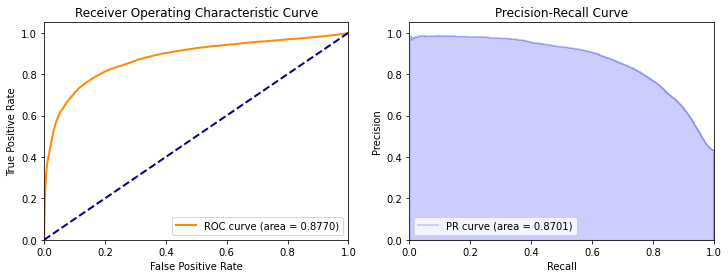

In [0]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from matplotlib import pyplot as plt

# Métricas
bcm = BinaryClassificationMetrics(predictions, scoreCol='probability', labelCol='satisfaction_binary')


fig, axs = plt.subplots(1, 2, figsize=(12, 4))
bcm.plot_roc_curve(ax=axs[0])
bcm.plot_pr_curve(ax=axs[1])